In [15]:
## Python 3.7 over, awkward1, numpy !

import awkward1 as ak
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import font_manager
import mplhep as hep

In [16]:
def Reader(directory,tuplelist,variable): ##(arr_like, arr_like, str)
    count = 0
    for f in tuplelist:
        tuplelist[count] = np.load(""+ directory +"/"+ str(f) +"_nTuple.npy",allow_pickle=True)[()][''+ variable +'']
        count+=1
    return 0

In [17]:
def Normalizer(DATASET,XSECSET,GENEVTSET):
    if len(DATASET) != len(XSECSET) or len(DATASET) != len(GENEVTSET):
        print("ERROR -> list size not matched!")
        return -1
    
    Normed_SET = []
    Lumi = 3000000
    for i in range(len(DATASET)):
        Normed_SET.append(ak.ones_like(DATASET[i]) * float(XSECSET[i]) * Lumi / float(GENEVTSET[i]))
    return Normed_SET

In [18]:
## Define your filepath, target tuples and physical variable

## Target directory
filepath = "./NTuples"

## Target variable
variable = "MET"

## Target samples
tuplelist = [
    "TT_had", # 0
    "TT_semi", # 1
    "TTW", # 2
    "TTZ", # 3
    "WW", # 4
    "WZ", # 5
    "ZZ", # 6
    "ST_t", # 7
    "ST_s", # 8
    "Signal" # 9
]

## Cross-section of each sample over Nevents
xseclist = [
    "210.5",
    "211.1",
    "1.13179",
    "0.88495",
    "78.09",
    "68.399",
    "15.909",
    "856.0",
    "67.69",
    "0.1" ### CONFIDENTIAL ###
]

## Total generated events
Neventlist = [
    "1000000",
    "1776547",
    "1000000",
    "1000000",
    "1000000",
    "751367",
    "999999",
    "1000000",
    "1000000",
    "100000"
]

In [19]:
## Call your Reading Function
Reader(filepath,tuplelist,variable)
print(tuplelist)

[<Array [51.7, 74.5, 64.4, ... 62.2, 50.3, 76.5] type='7230 * float32'>, <Array [89.1, 52.8, 111, ... 298, 122, 68] type='3509 * float32'>, <Array [108, 119, 216, ... 540, 225, 68.1] type='14207 * float32'>, <Array [53.4, 137, 66.7, 69.9, ... 142, 79, 56] type='12755 * float32'>, <Array [133, 61, 52.7] type='3 * float32'>, <Array [99.9, 56.7, 54.7, ... 114, 64.7, 111] type='104 * float32'>, <Array [54.2, 56.5, 70, ... 70.3, 75.4, 147] type='151 * float32'>, <Array [66.8, 102, 71.6, ... 64.2, 80.3, 124] type='569 * float32'>, <Array [199, 82.4, 79.3, ... 60.8, 61.8, 63.2] type='528 * float32'>, <Array [57.3, 165, 96.4, 52, ... 383, 104, 106] type='10496 * float32'>]


In [20]:
## Set Normalize term
Weightlist = Normalizer(tuplelist,xseclist,Neventlist)
print(Weightlist)

[<Array [632, 632, 632, 632, ... 632, 632, 632] type='7230 * float64'>, <Array [356, 356, 356, 356, ... 356, 356, 356] type='3509 * float64'>, <Array [3.4, 3.4, 3.4, 3.4, ... 3.4, 3.4, 3.4] type='14207 * float64'>, <Array [2.65, 2.65, 2.65, ... 2.65, 2.65, 2.65] type='12755 * float64'>, <Array [234, 234, 234] type='3 * float64'>, <Array [273, 273, 273, 273, ... 273, 273, 273] type='104 * float64'>, <Array [47.7, 47.7, 47.7, ... 47.7, 47.7, 47.7] type='151 * float64'>, <Array [2.57e+03, 2.57e+03, ... 2.57e+03] type='569 * float64'>, <Array [203, 203, 203, 203, ... 203, 203, 203] type='528 * float64'>, <Array [3, 3, 3, 3, 3, 3, ... 3, 3, 3, 3, 3, 3] type='10496 * float64'>]


In [21]:
## Remind your sequence
#    "TT_had", # 0
#    "TT_semi", # 1
#    "TTW", # 2
#    "TTZ", # 3
#    "WW", # 4
#    "WZ", # 5
#    "ZZ", # 6
#    "ST_t", # 7
#    "ST_s", # 8
#    "Signal" # 9

In [22]:
## Top pair (FH)
TTH = np.array(tuplelist[0])
TTH_w = np.array(Weightlist[0])

## Top pair (1l)
TTL = np.array(tuplelist[1])
TTL_w = np.array(Weightlist[1])

## Signal example
SIG = np.array(tuplelist[9])
SIG_w = np.array(Weightlist[9])

In [23]:
## It is useful to merge your events using np.concatenate()

## Top pair + Boson
## TTW + TTZ 
TTV = np.concatenate((tuplelist[2],tuplelist[3]))
TTV_w = np.concatenate((Weightlist[2],Weightlist[3]))

## Diboson
DIV = np.concatenate((tuplelist[4],tuplelist[5],tuplelist[6]))
DIV_w = np.concatenate((Weightlist[4],Weightlist[5],Weightlist[6]))

## Single top
ST = np.concatenate((tuplelist[7],tuplelist[8]))
ST_w = np.concatenate((Weightlist[7],Weightlist[8]))

In [24]:
## Now we can make a plotlist

BKG = [DIV,TTV,TTL,TTH,ST]
WEI = [DIV_w,TTV_w,TTL_w,TTH_w,ST_w]
COLOR=['lightgreen','grey','orange','blue','indigo']
EDGE = ['black','black','black','black','black']
LABEL=['Diboson','Top pair + V','Top pair (1$\ell$)','Top pair (FH)','Single top']

In [25]:
## 자주 사용하는 변수들은 미리 정의해둡니다.
RANGE = (0,500)
BIN = int(max(RANGE) / 50)

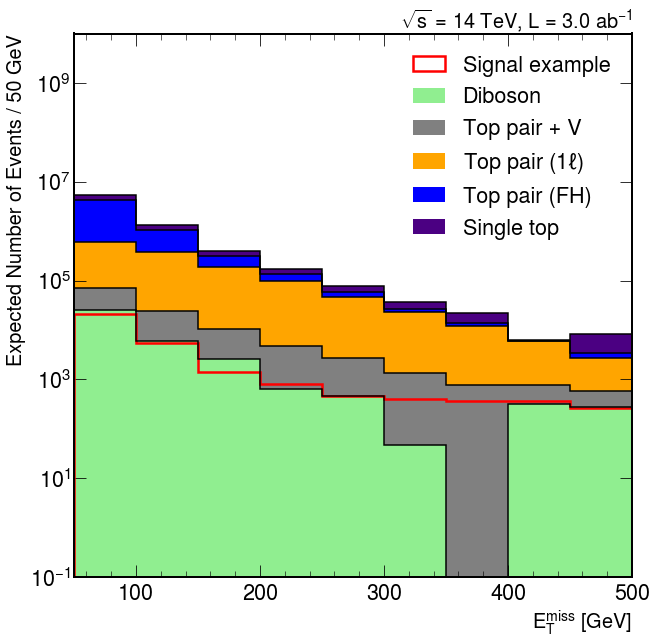

In [28]:
## Setting Axes
plt.xlim(50,500)
plt.ylim(0.1,1e+10)
plt.yscale('log')

## CMS style 
plt.style.use(hep.style.CMS)

## Draw histogram
plt.hist(SIG,weights=SIG_w,range=RANGE,bins=BIN,label='Signal example',color='red',histtype='step',linewidth=2.5)
plt.hist(BKG,weights=WEI,stacked=True,range=RANGE,bins=BIN,label=LABEL,color=COLOR)

## Draw Edge!
plt.hist(BKG,weights=WEI,stacked=True,range=RANGE,bins=BIN,color=EDGE,histtype='step',linewidth=1.5)

## Set titles
plt.xlabel("$E^{miss}_{T}$ [GeV]",fontsize=20)
plt.ylabel("Expected Number of Events / "+ str(int(max(RANGE)/BIN)) + " GeV",fontsize=20)
plt.title("$\sqrt{s}$ = 14 TeV, L = 3.0 ab$^{-1}$", loc='right',fontsize=20)

plt.legend(fontsize=20)
plt.legend()
plt.show()

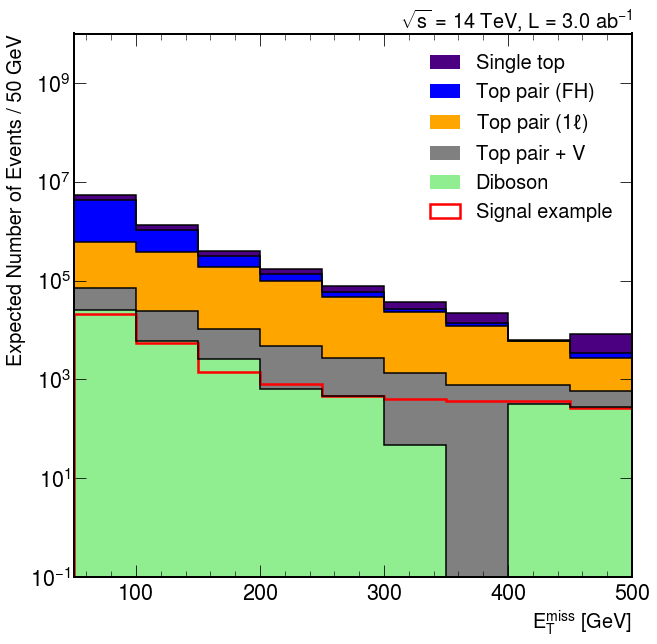

In [30]:
## Setting Axes
plt.xlim(50,500)
plt.ylim(0.1,1e+10)
plt.yscale('log')

## CMS style
plt.style.use(hep.style.CMS)

## Draw histogram
plt.hist(SIG,weights=SIG_w,range=RANGE,bins=BIN,label='Signal example',color='red',histtype='step',linewidth=2.5)
plt.hist(BKG,weights=WEI,stacked=True,range=RANGE,bins=BIN,label=LABEL,color=COLOR)

## Draw Edge!
plt.hist(BKG,weights=WEI,stacked=True,range=RANGE,bins=BIN,color=EDGE,histtype='step',linewidth=1.5)

## Set titles
plt.xlabel("$E^{miss}_{T}$ [GeV]",fontsize=20)
plt.ylabel("Expected Number of Events / "+ str(int(max(RANGE)/BIN)) + " GeV",fontsize=20)
plt.title("$\sqrt{s}$ = 14 TeV, L = 3.0 ab$^{-1}$", loc='right',fontsize=20)

## Reversed Legend
current_handles, current_labels = plt.gca().get_legend_handles_labels()
reversed_handles = list(reversed(current_handles))
reversed_labels = list(reversed(current_labels))

plt.legend(reversed_handles,reversed_labels,fontsize=20,loc='upper right')
plt.show()